In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def CreateXb(X):
    N = X.shape[0]
    ones = np.ones([N, 1])
    Xb = np.hstack([ones, X])
    return Xb

In [3]:
def FindWLocal(epoch, lr, Xb, Y):
    N = Xb.shape[0]
    D_1 = Xb.shape[1]
    W = np.random.randn(D_1, 1)
    error_list = []
    
    for i in range(epoch):
        Yhat = FindYhat(Xb, W)
        S = np.dot(Xb.T, Y-Yhat)
        W = W + lr * S/N
        error_list.append(FindError(Y, Yhat))
    return W, error_list

In [5]:
def FindYhat(Xb, W):
    Z = np.dot(Xb, W)
    Yhat = 1/(1+np.exp(-Z))
    return Yhat

In [6]:
def FindError(Y, Yhat):
    E = 0
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            E = E - np.log(Yhat[i])
        else:
            E = E - np.log(1 - Yhat[i])
    return E

In [8]:
Data = pd.read_csv('Data.csv') # output must be 0 or 1
DataMatrix = Data.values

In [10]:
D = DataMatrix.shape[1] - 1
X = DataMatrix[:, :D]
Y = DataMatrix[:, D:]

X_Train = X[:70, :]
Y_Train = Y[:70, :]

X_Test = X[70:, :]
Y_Test = Y[70:, :]

In [14]:
XbTrain = CreateXb(X_Train)
W, error_list_train = FindWLocal(1000, 0.01, XbTrain, Y_Train)
YhatTrain = FindYhat(XbTrain, W)

<ipython-input-6-26f4c1144cd7>:7: RuntimeWarning: divide by zero encountered in log
  E = E - np.log(1 - Yhat[i])


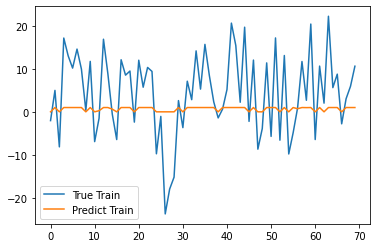

In [15]:
plt.plot(Y_Train, label = 'True Train')
plt.plot(YhatTrain, label = 'Predict Train')
plt.legend()

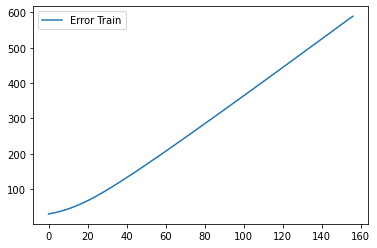

In [16]:
plt.plot(error_list_train, label='Error Train')
plt.legend()

In [17]:
ErrorTrain = FindError(Y_Train, YhatTrain)
print(ErrorTrain)

[inf]


<ipython-input-6-26f4c1144cd7>:7: RuntimeWarning: divide by zero encountered in log
  E = E - np.log(1 - Yhat[i])


In [18]:
UnseenXb = CreateXb(X_Test)
UnseenYhat = FindYhat(UnseenXb, W)

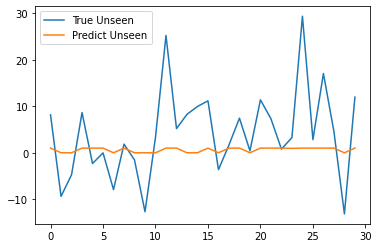

In [19]:
plt.plot(Y_Test, label='True Unseen')
plt.plot(UnseenYhat, label='Predict Unseen')
plt.legend()

In [20]:
ErrorUnseen = FindError(Y_Test, UnseenYhat)
print(ErrorUnseen)

[inf]


<ipython-input-6-26f4c1144cd7>:7: RuntimeWarning: divide by zero encountered in log
  E = E - np.log(1 - Yhat[i])


In [21]:
import numpy
from sklearn import linear_model

#Reshaped for Logistic function.
X = numpy.array([3.78, 2.44, 2.09, 0.14, 1.72, 1.65, 4.92, 4.37, 4.96, 4.52, 3.69, 5.88]).reshape(-1,1)
y = numpy.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

logr = linear_model.LogisticRegression()
logr.fit(X,y)

log_odds = logr.coef_
odds = numpy.exp(log_odds)

print(odds)

[[4.03541657]]
